## A short guide and example to run fingerprint

We whant to estimate the proportion contributed from each source to sediment samples taked in river and measure the increase in incertainty when reducing the number of samples using a implementation of Marke and Minella (2016) method. 


The first think to do is to import the fingerprinting python module as showed bellow:

In [1]:
from fingerprint import Fingerprint

Then, we need to create a fingerprint object instance and set the data file.

In [2]:
fp = Fingerprint("sampledata.xls")

Now we can see some infos.

In [3]:
fp.infos()

Sheet name: a_fonte(D)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: a_fonte(E)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 9
--
Sheet name: a_fonte(L)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 20
--
Sheet name: Sedimentos(Y)
Columns: ['Fe', 'Mn', 'Cu', 'Zn', 'Ca', 'K', 'P']
Number of samples: 24
--


In [4]:
nY = 24 # max 24
nD = 9  # max 9
nE = 9  # max 9
nL = 20 # max 20


sY,sD,sE,sL = fp.randon_choice(nY, nD, nE, nL)

# Run the model an get all solutions
P = fp.run(sY,sD,sE,sL, solve=2)
print(P.shape)

(3, 5843)


Show de results for P1 and P2.

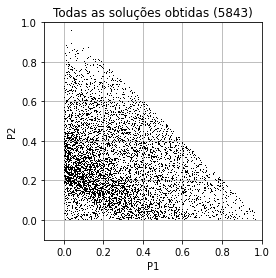

In [5]:
fp.plot2D(P[0:2], title = "Todas as soluções obtidas")

In [6]:
P.shape

(3, 5843)

Evaluating and show de confidence region.

Área: 0.41779864998153216


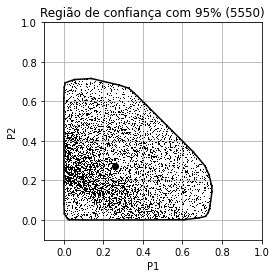

In [7]:
P = fp.confidence_region(P[0:2], p = 95, spacedist = "mahalanobis")
fp.plot2D(P, mean=True, convex_hull = True, title = "Região de confiança com 95%")

In [8]:
# Run multiples times and store for each
# number of resample in nYs list and store 
# the coeficient of variation CVYs

nYs = [2,4,8,12,16,20,24]

Ycv0, Ycv1, Ycv2 = fp.multi_runs(50, nYs,nD,nE,nL)


Samples sizes: [2, 4, 8, 12, 16, 20, 24]
Sample size: 2
Sample size: 4
Sample size: 8
Sample size: 12
Sample size: 16
Sample size: 20
Sample size: 24
Done!
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.354 	0.047 	3240 	1580 	0.374 	0.205 	0.421
4 	0.383 	0.023 	6480 	1716 	0.413 	0.233 	0.354
8 	0.395 	0.015 	12960 	2410 	0.338 	0.281 	0.381
12 	0.399 	0.011 	19440 	4165 	0.317 	0.251 	0.432
16 	0.400 	0.008 	25920 	5160 	0.360 	0.214 	0.426
20 	0.403 	0.004 	32400 	6147 	0.341 	0.234 	0.425
24 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
--------------------------------------------------------------
Áreas médias: [0.354 0.383 0.395 0.399 0.4   0.403 0.403]
Desvios padrão: [13.435  6.068  3.823  2.657  2.061  1.067  0.   ]
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.354 	0.047 	3240 	1580 	0.374 	0.205 	0.421
4 	0.383 	0.023 	6480

In [9]:
X1_0 = nYs.copy()
Y1_0 = Ycv0.copy()

X1_1 = nYs.copy()
Y1_1 = Ycv1.copy()

X1_2 = nYs.copy()
Y1_2 = Ycv2.copy()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


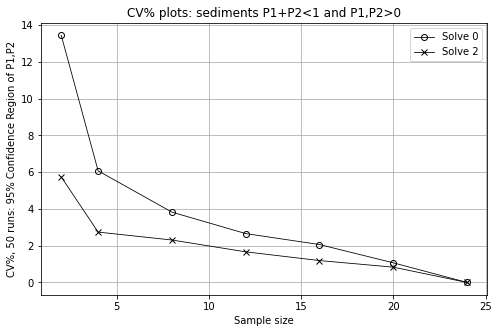

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         #X1_1, Y1_1, "ks-",
         X1_2, Y1_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0',
            #'Solve 1', 
            'Solve 2'], loc='upper right')
plt.savefig('P1+P2<1_and_P1,P2>0.eps')

plt.grid()
plt.show()

In [16]:
nLs = [2,4,8,12,16,20]

Lcv0, Lcv1, Lcv2 = fp.multi_runs(50, nY,nD,nE,nLs)

Samples sizes: [2, 4, 8, 12, 16, 20]
Sample size: 2
Sample size: 4
Sample size: 8
Sample size: 12
Sample size: 16
Sample size: 20
Done!
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.358 	0.044 	3888 	775 	0.310 	0.253 	0.437
4 	0.378 	0.028 	7776 	1664 	0.320 	0.231 	0.449
8 	0.396 	0.017 	15552 	3097 	0.361 	0.259 	0.380
12 	0.397 	0.012 	23328 	4741 	0.327 	0.219 	0.454
16 	0.400 	0.006 	31104 	5992 	0.350 	0.234 	0.417
20 	0.403 	0.000 	38880 	7722 	0.341 	0.238 	0.420
--------------------------------------------------------------
Áreas médias: [0.358 0.378 0.396 0.397 0.4   0.403]
Desvios padrão: [12.4    7.532  4.276  2.921  1.514  0.   ]
nSamp 	Mean 	Std 	Total 	Feas 	MeanP1 	MeanP2 	MeanP3
--------------------------------------------------------------
2 	0.358 	0.044 	3888 	775 	0.310 	0.253 	0.437
4 	0.378 	0.028 	7776 	1664 	0.320 	0.231 	0.449
8 	0.396 	0.017 	15552 	3097 	0.361 	0.259 	0.380
12 	0.39

In [17]:
X2_0 = nLs.copy()
Y2_0 = Lcv0.copy()

X2_1 = nLs.copy()
Y2_1 = Lcv0.copy()

X2_2 = nLs.copy()
Y2_2 = Lcv2.copy()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


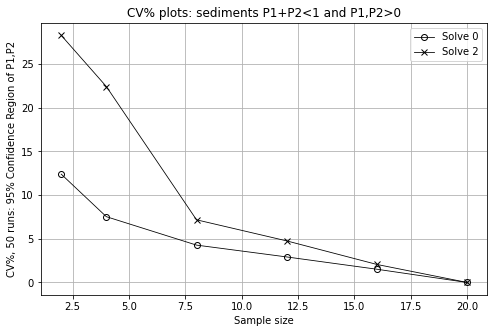

In [18]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 5))
plt.plot(X2_0, Y2_0, "ko-",
         #X2_1, Y2_1, "ks-",
         X2_2, Y2_2, "kx-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Solve 0',
            #'Solve 1', 
            'Solve 2'], loc='upper right')
plt.savefig('P1+P2<1_and_P1,P2>0.eps')

plt.grid()
plt.show()

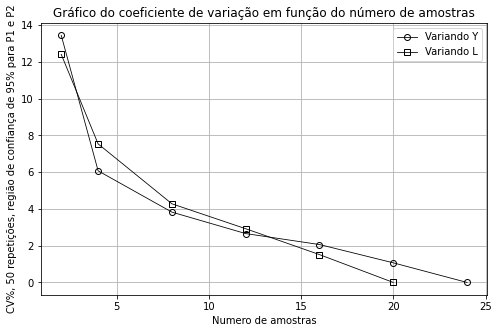

In [23]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_0, Y1_0, "ko-",
         X2_0, Y2_0, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('Gráfico do coeficiente de variação em função do número de amostras')
plt.xlabel('Numero de amostras')
plt.ylabel('CV%, 50 repetições, região de confiança de 95% para P1 e P2')
plt.legend(['Variando Y',
            #'OLS3x3', 
            'Variando L'], loc='upper right')
plt.savefig('CVvsAmostras.png')

plt.grid()
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


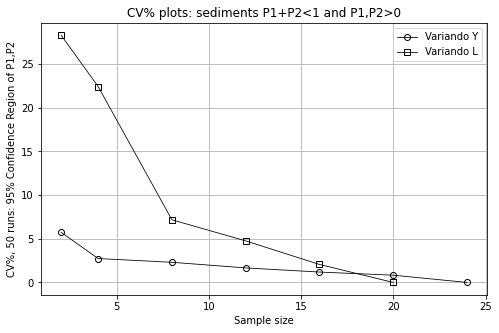

In [20]:
fig = plt.figure(figsize=(8, 5))
plt.plot(X1_2, Y1_2, "ko-",
         X2_2, Y2_2, "ks-",
        fillstyle='none',
        linewidth=0.8)
#plt.plot(X1, Y1, "o-", )
plt.title('CV% plots: sediments P1+P2<1 and P1,P2>0')
plt.xlabel('Sample size')
plt.ylabel('CV%, 50 runs: 95% Confidence Region of P1,P2')
plt.legend(['Variando Y',
            'Variando L'], loc='upper right')
plt.savefig('P1+P2<1_and_P1,P2>0.eps')

plt.grid()
plt.show()